In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = {
    "x" : np.arange (1,101),
    "y" : np.hstack((np.zeros(50), np.ones(50)))
}
df = pd.DataFrame(data)
df

,x,y
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
95,96,1.0
96,97,1.0
97,98,1.0
98,99,1.0


## Logistic Regression

Logit / Sigmoid function $\displaystyle \hat{y} = \frac {1} {1 + e ^ {- (mx + c)}} $

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
modelLin = LogisticRegression(solver= "liblinear")
modelLbf = LogisticRegression(solver= "lbfgs")
modelLin.fit(df[["x"]], df["y"])
modelLbf.fit(df[["x"]], df["y"])
print ("m Linear", modelLin.coef_)
print ("c Linear", modelLin.intercept_)
print ("m Lbfgs", modelLbf.coef_)
print ("c Lbfgs", modelLbf.intercept_)

m Linear [[0.08749225]]
c Linear [-4.0543733]
m Lbfgs [[1.19450816]]
c Lbfgs [-60.32266589]


In [26]:
mLn = modelLin.coef_[0][0]
cLn = modelLin.intercept_[0]
mLb = modelLbf.coef_[0][0]
cLb = modelLbf.intercept_[0]

df["y'Lin"] = modelLin.predict(df[["x"]])
df["probLin"] = 1 / (1 + np.exp(-1 * (mLn * df["x"] + cLn)))

df["y'Lbf"] = modelLbf.predict(df[["x"]])
df["probLbf"] = 1 / (1 + np.exp(-1 * (mLb * df["x"] + cLb)))
df

,x,y,y'Lin,probLin,y'Lbf,probLbf
0,1,0.0,0.0,0.018581,0.0,2.093955e-26
1,2,0.0,0.0,0.020245,0.0,6.914100e-26
2,3,0.0,0.0,0.022055,0.0,2.282990e-25
3,4,0.0,0.0,0.024024,0.0,7.538280e-25
4,5,0.0,0.0,0.026163,0.0,2.489090e-24
...,...,...,...,...,...,...
95,96,1.0,1.0,0.987193,1.0,1.000000e+00
96,97,1.0,1.0,0.988253,1.0,1.000000e+00
97,98,1.0,1.0,0.989227,1.0,1.000000e+00
98,99,1.0,1.0,0.990120,1.0,1.000000e+00


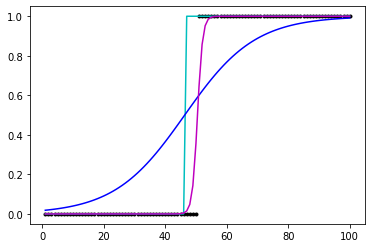

In [28]:
plt.plot(df["x"], df["y"], "k.")
plt.plot(df["x"], df["y'Lin"], "c-")
plt.plot(df["x"], df["probLin"], "b-")
plt.plot(df["x"], df["probLbf"], "m-")